In [1]:
secret = '100101'

In [2]:
n = len(secret)

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
q = QuantumRegister(n+1)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)

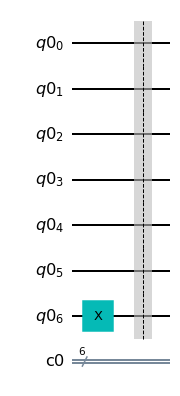

In [4]:
qc.x(q[n])
qc.barrier()
qc.draw('mpl')

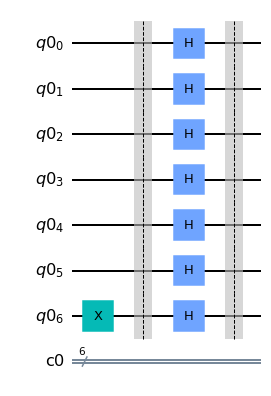

In [5]:
for i in range(n+1):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

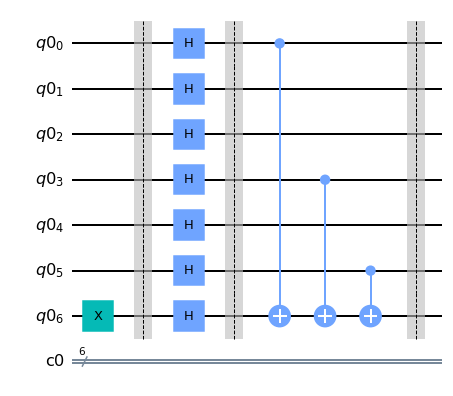

In [6]:
for i in range(n):
    if secret[i]=='1':
        qc.cx(q[i],q[n])
qc.barrier()
qc.draw('mpl')

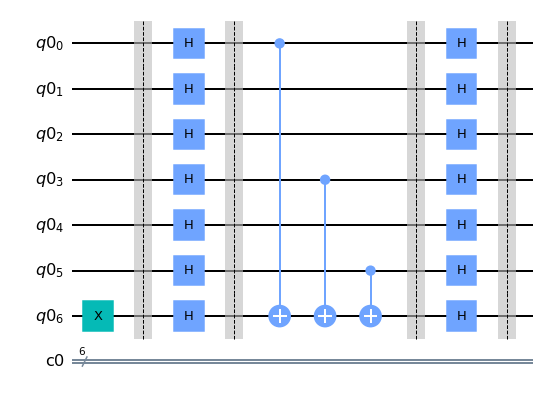

In [7]:
for i in range(n+1):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

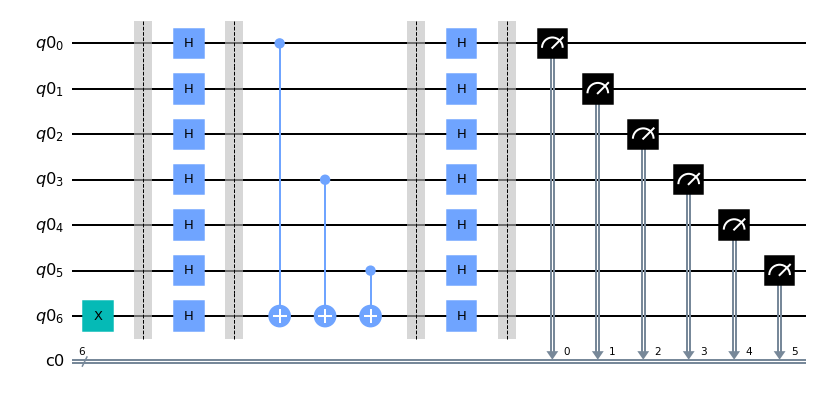

In [8]:
for i in range(n):
    qc.measure(q[i],c[i])
qc.draw('mpl')

{'101001': 1024}


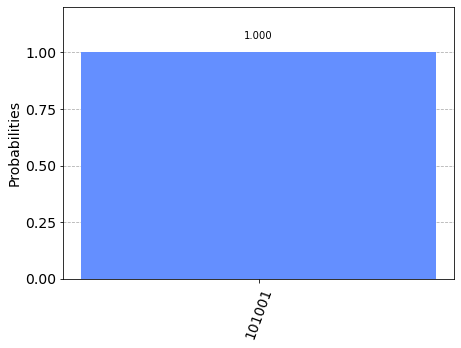

In [9]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [10]:
from qiskit.test.mock import FakeCambridge
device_simulation = FakeCambridge()

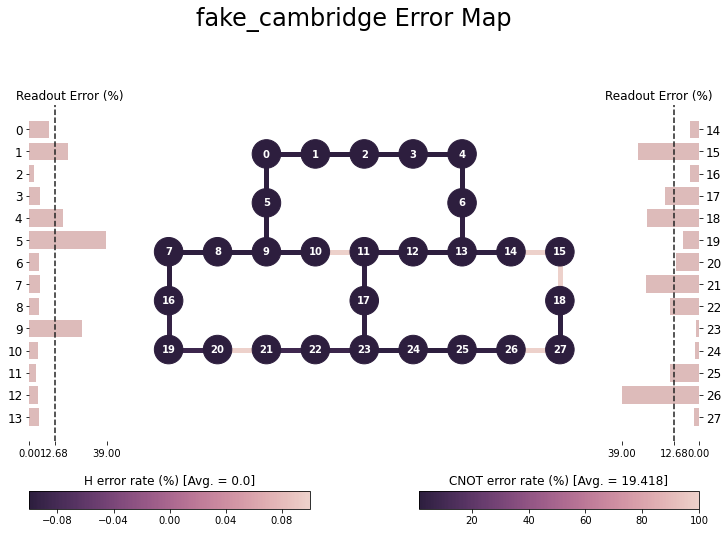

In [11]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulation)

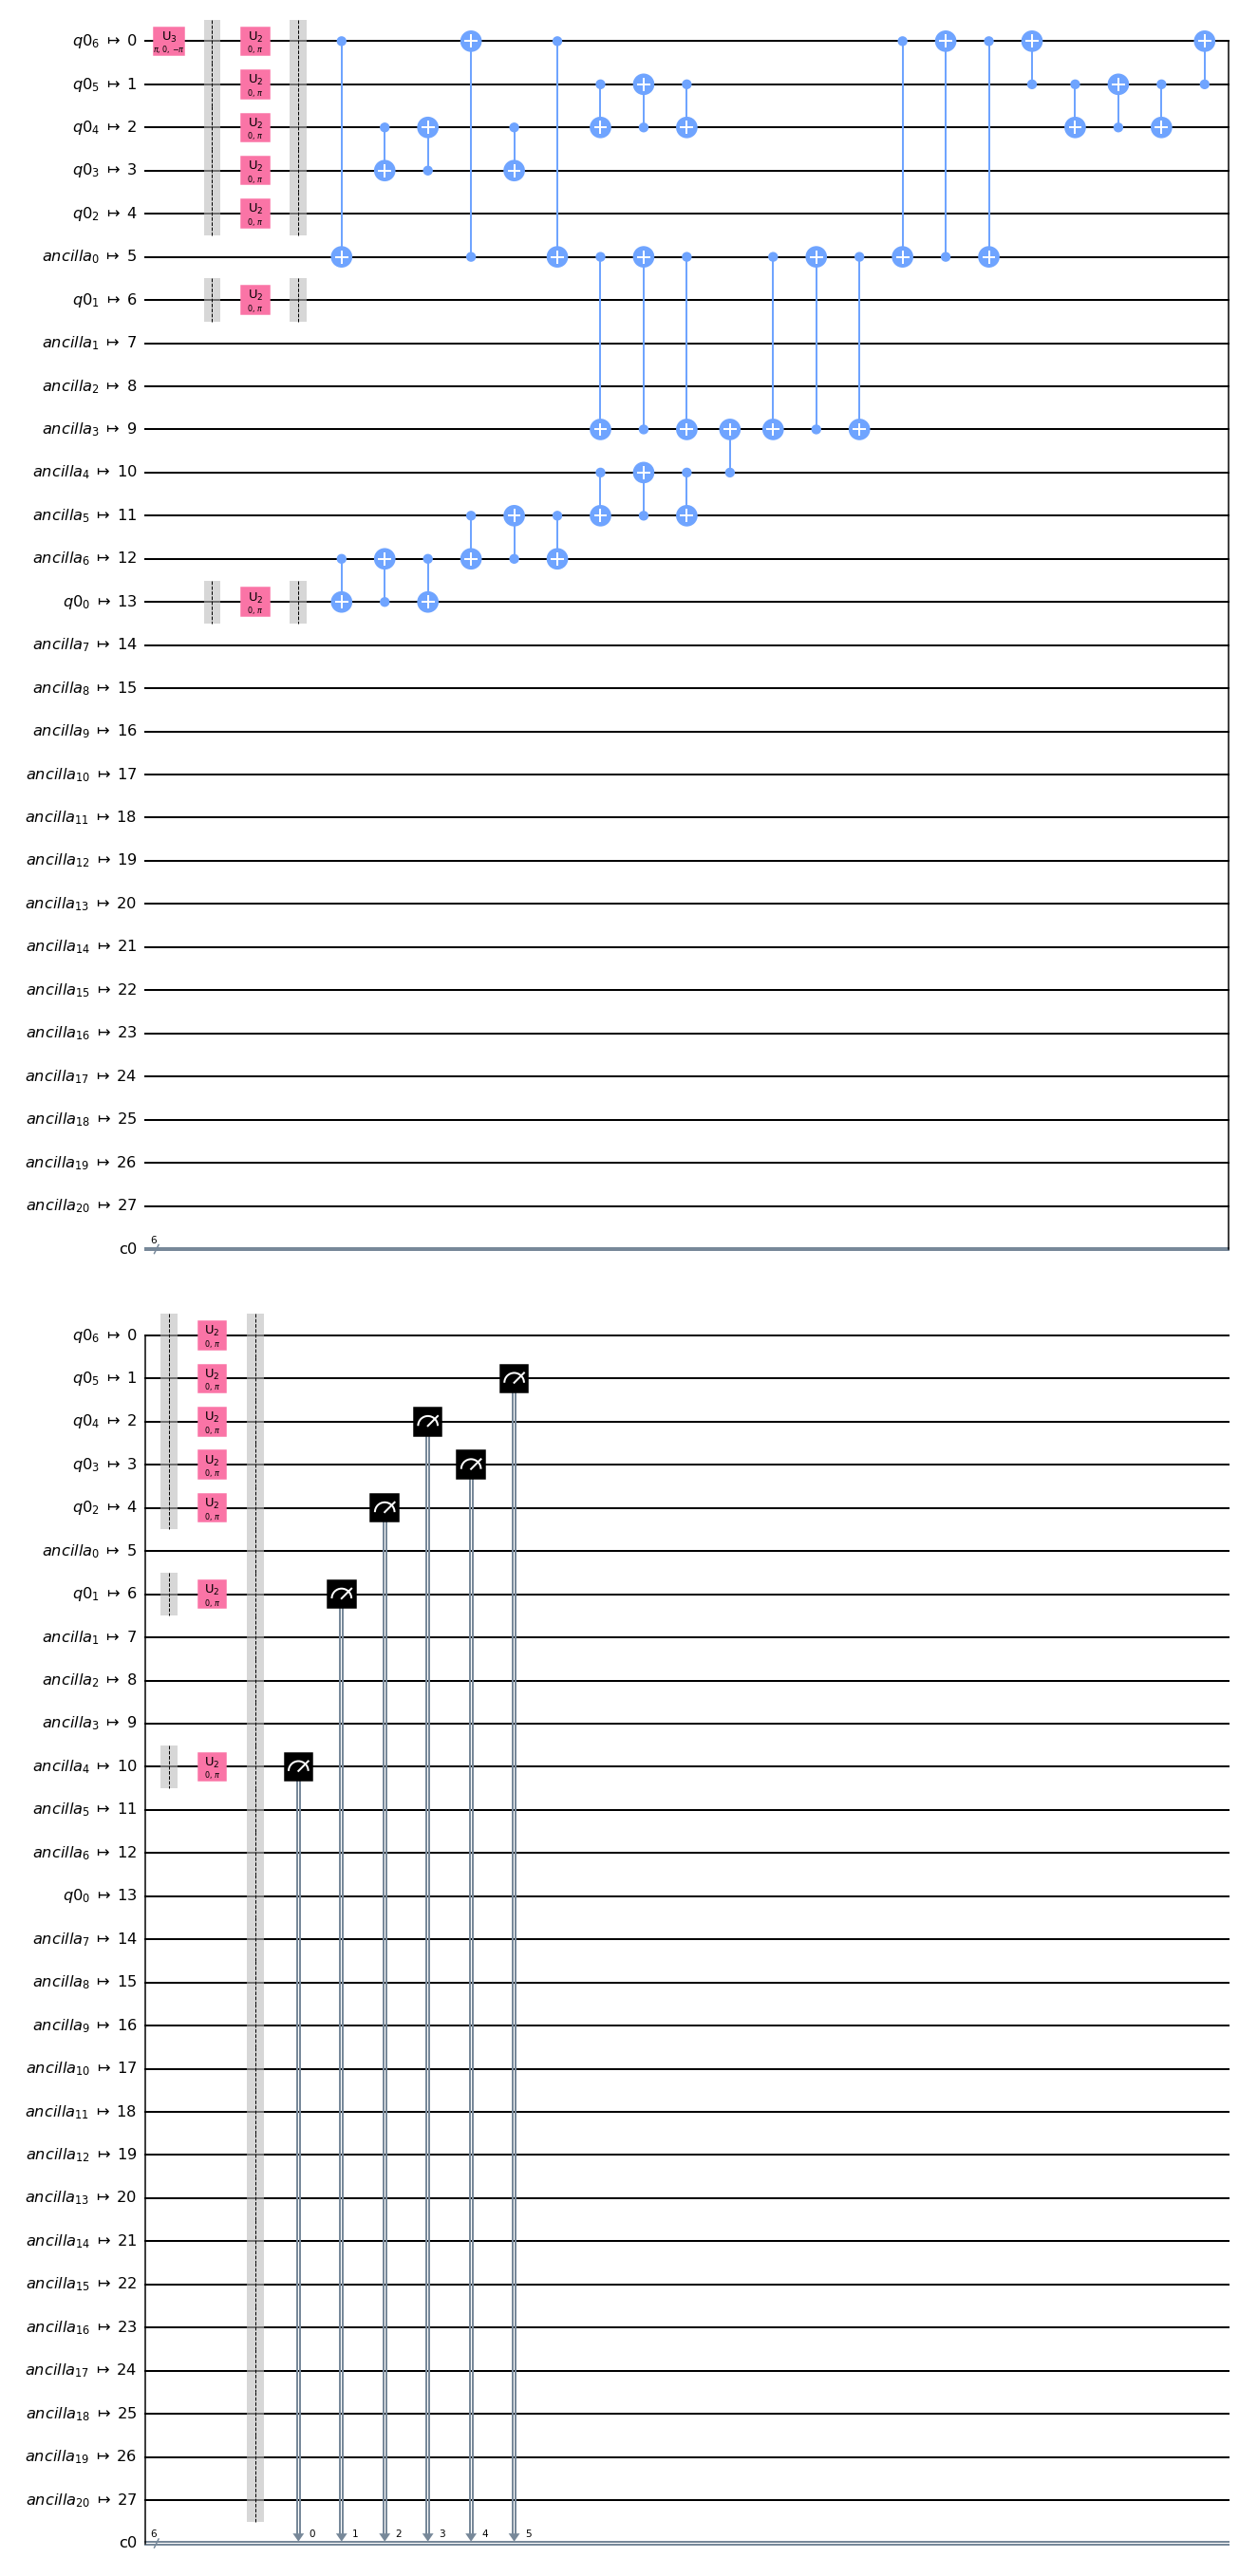

In [12]:
qc2 = transpile(qc,device_simulation)
qc2.draw('mpl')

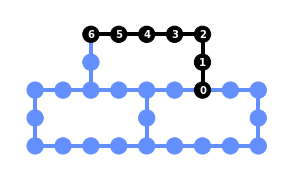

In [13]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc2,device_simulation)

{'110100': 2, '101111': 1, '011101': 1, '110101': 1, '010101': 1, '110000': 6, '000001': 49, '001101': 16, '101101': 44, '001001': 59, '111100': 4, '000101': 6, '101100': 47, '101001': 215, '101000': 223, '100001': 42, '100101': 9, '111000': 11, '100110': 1, '111001': 7, '111010': 1, '001011': 2, '100000': 50, '010000': 2, '001100': 22, '001000': 78, '111110': 1, '101010': 6, '100100': 8, '001010': 1, '000010': 2, '000000': 57, '101011': 5, '110110': 1, '110001': 8, '011100': 1, '011001': 4, '111101': 3, '010001': 7, '000100': 13, '100011': 2, '010100': 3, '011000': 2}


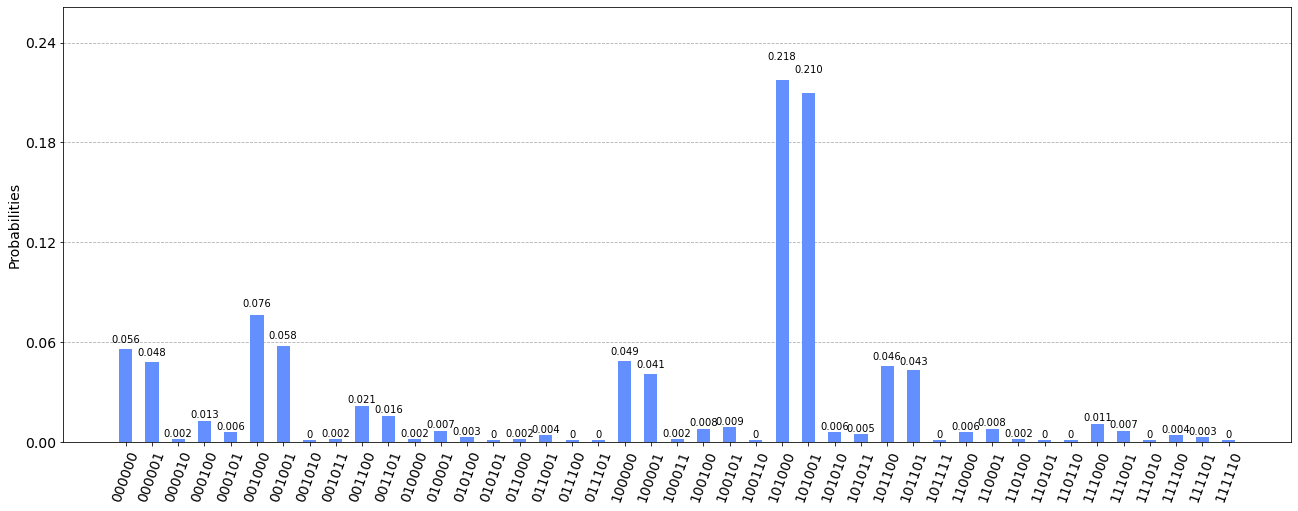

In [16]:
job = device_simulation.run(qc2,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(22,8))

In [15]:
secret = '100101'